<a href="https://colab.research.google.com/github/omair1409/DataScience_Practice/blob/main/Indiana_ShowCase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


 **Case study for Electric Data science project**



> Done by Abdul Omair











In this mini-project I imported data from U.S. goverment Data (Department of Energy) [link to the website](https://catalog.data.gov/dataset/commercial-and-residential-hourly-load-profiles-for-all-tmy3-locations-in-the-united-state-bbc75).



In [2]:
# start with importing needed packages and load the data 

import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

df = pd.read_csv('/content/Elec_In.csv.csv')

## 

In [3]:
# check the table first 
df.head(5)               


,Date/Time,Electricity:Facility [kWh](Hourly),Gas:Facility [kWh](Hourly),Heating:Electricity [kWh](Hourly),Heating:Gas [kWh](Hourly),Cooling:Electricity [kWh](Hourly),HVACFan:Fans:Electricity [kWh](Hourly),Electricity:HVAC [kWh](Hourly),Fans:Electricity [kWh](Hourly),General:InteriorLights:Electricity [kWh](Hourly),General:ExteriorLights:Electricity [kWh](Hourly),Appl:InteriorEquipment:Electricity [kWh](Hourly),Misc:InteriorEquipment:Electricity [kWh](Hourly),Water Heater:WaterSystems:Gas [kWh](Hourly)
0,01/01 01:00:00,0.935553,8.261324,0.0,7.799960,0.0,0.214759,0.214759,0.214759,0.161613,0.035211,0.092943,0.413915,0.432855
1,01/01 02:00:00,0.811067,8.422575,0.0,8.057443,0.0,0.221848,0.221848,0.221848,0.094274,0.020540,0.076186,0.381107,0.338882
2,01/01 03:00:00,0.752614,8.128327,0.0,7.789753,0.0,0.214477,0.214477,0.214477,0.067339,0.014671,0.062327,0.376688,0.312628
3,01/01 04:00:00,0.726348,7.675900,0.0,7.331636,0.0,0.201864,0.201864,0.201864,0.067339,0.014671,0.053976,0.371386,0.318684
4,01/01 05:00:00,0.723460,7.723558,0.0,7.306015,0.0,0.201159,0.201159,0.201159,0.067339,0.014671,0.065823,0.357356,0.392929


In [4]:
# check the types of data (each column)

df.dtypes

Date/Time                                            object
Electricity:Facility [kWh](Hourly)                  float64
Gas:Facility [kWh](Hourly)                          float64
Heating:Electricity [kWh](Hourly)                   float64
Heating:Gas [kWh](Hourly)                           float64
Cooling:Electricity [kWh](Hourly)                   float64
HVACFan:Fans:Electricity [kWh](Hourly)              float64
Electricity:HVAC [kWh](Hourly)                      float64
Fans:Electricity [kWh](Hourly)                      float64
General:InteriorLights:Electricity [kWh](Hourly)    float64
General:ExteriorLights:Electricity [kWh](Hourly)    float64
Appl:InteriorEquipment:Electricity [kWh](Hourly)    float64
Misc:InteriorEquipment:Electricity [kWh](Hourly)    float64
Water Heater:WaterSystems:Gas [kWh](Hourly)         float64
dtype: object

# Type of analysis in Electricity sector:

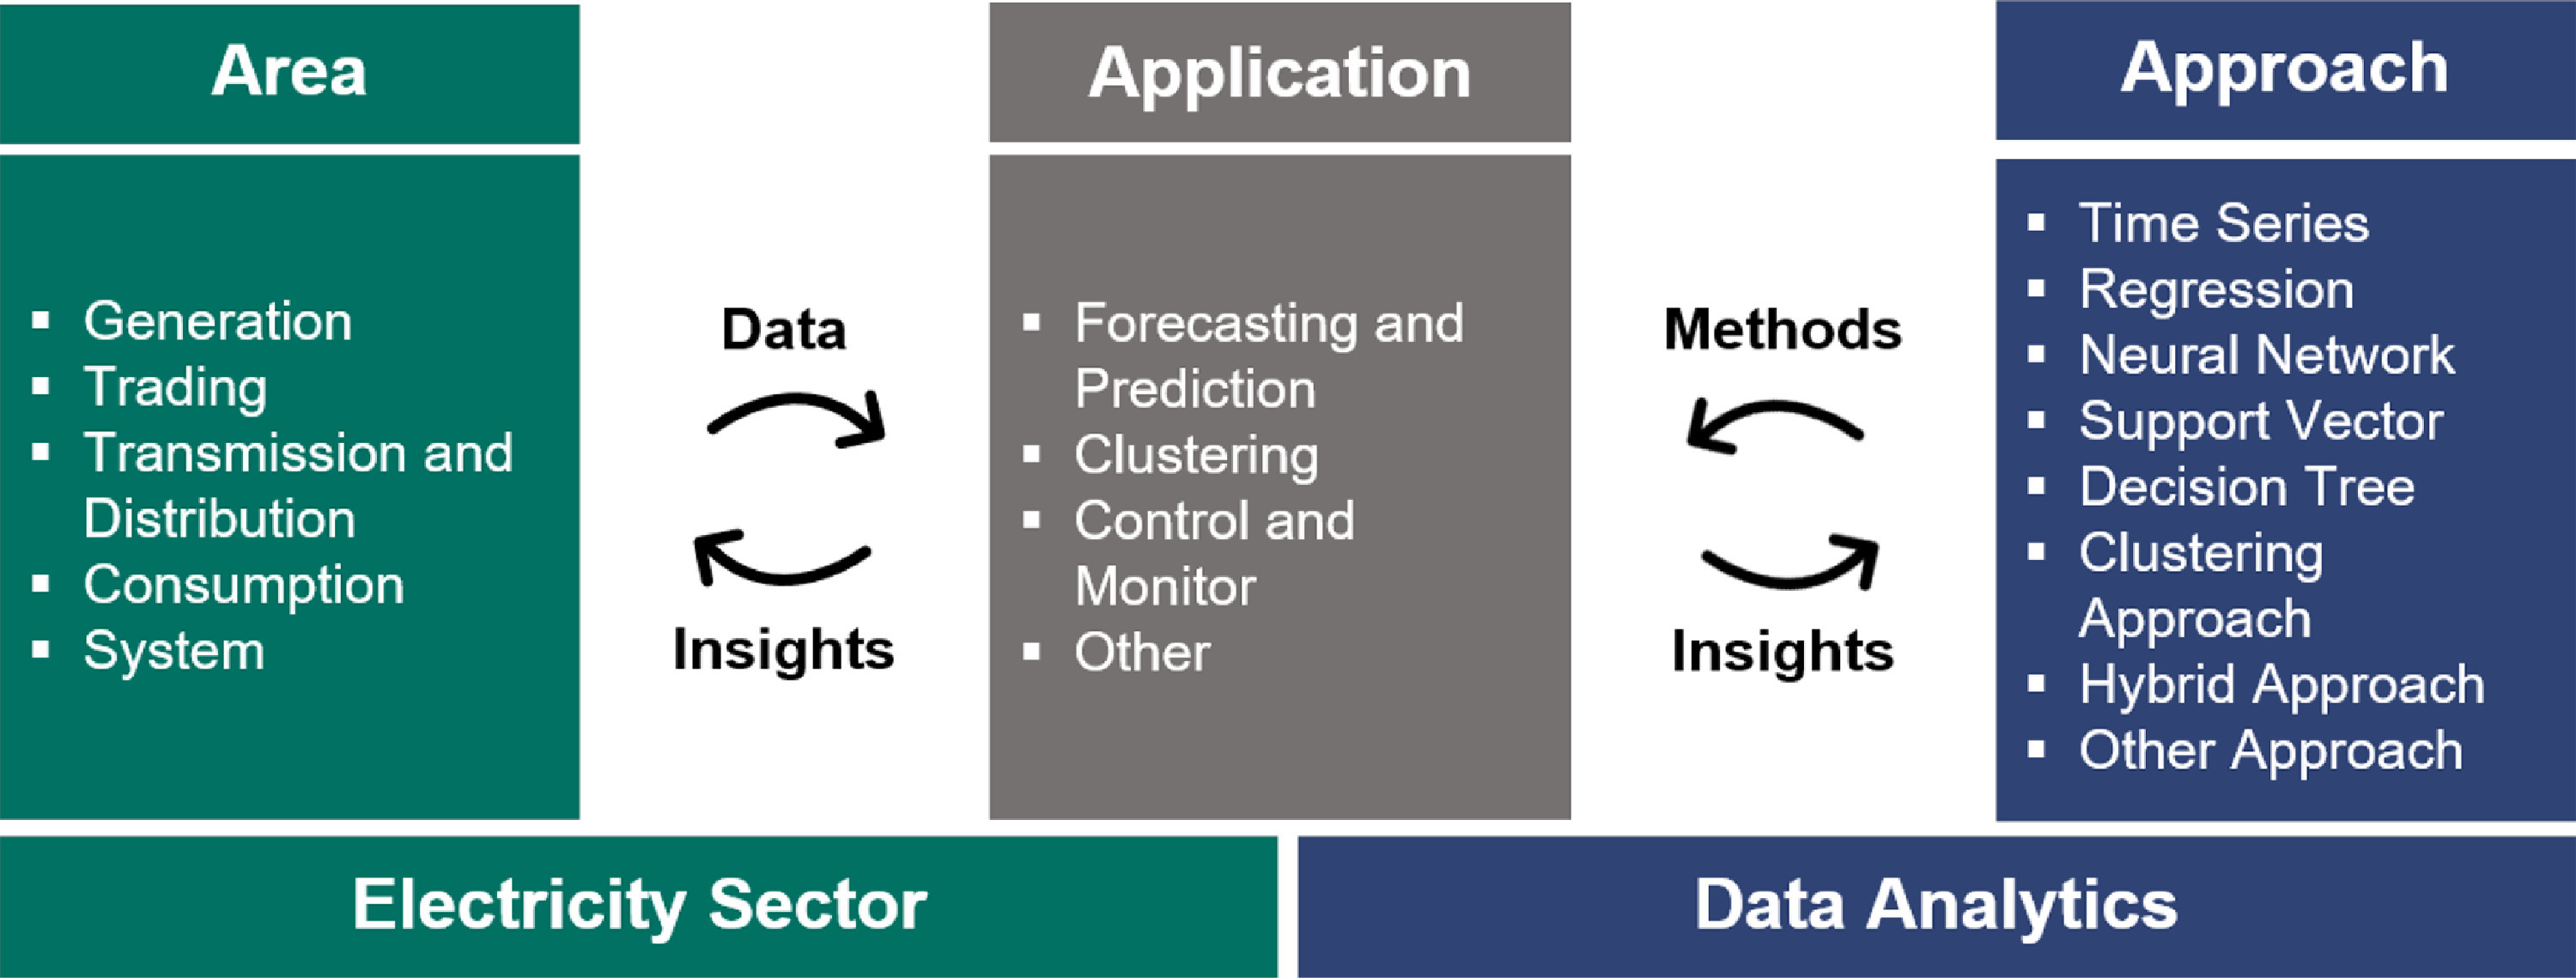

In [5]:
# Now I need to have the sum of each day (instead of each hour)
df_new = df.groupby(df.index // 24).sum()
df_new

<ipython-input-5-d62d0e30aa55>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_new = df.groupby(df.index // 24).sum()


,Electricity:Facility [kWh](Hourly),Gas:Facility [kWh](Hourly),Heating:Electricity [kWh](Hourly),Heating:Gas [kWh](Hourly),Cooling:Electricity [kWh](Hourly),HVACFan:Fans:Electricity [kWh](Hourly),Electricity:HVAC [kWh](Hourly),Fans:Electricity [kWh](Hourly),General:InteriorLights:Electricity [kWh](Hourly),General:ExteriorLights:Electricity [kWh](Hourly),Appl:InteriorEquipment:Electricity [kWh](Hourly),Misc:InteriorEquipment:Electricity [kWh](Hourly),Water Heater:WaterSystems:Gas [kWh](Hourly)
0,30.158973,169.810593,0.0,147.518946,0.0,4.061681,4.061681,4.061681,6.760808,1.473008,6.361219,11.046568,21.530784
1,28.934524,147.621875,0.0,126.859411,0.0,3.492856,3.492856,3.492856,6.760808,1.473008,5.705595,11.046568,20.001601
2,29.581962,171.155846,0.0,150.374168,0.0,4.140295,4.140295,4.140295,6.760808,1.473008,5.705595,11.046568,20.020816
3,29.961933,184.969850,0.0,164.174562,0.0,4.520265,4.520265,4.520265,6.760808,1.473008,5.705595,11.046568,20.034425
4,29.552778,170.143377,0.0,149.314218,0.0,4.111111,4.111111,4.111111,6.760808,1.473008,5.705595,11.046568,20.068297
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,28.913477,137.064732,0.0,116.707322,0.0,3.213336,3.213336,3.213336,6.973041,1.519248,5.705595,11.046568,19.596547
361,29.487948,157.964494,0.0,137.571909,0.0,3.787807,3.787807,3.787807,6.973041,1.519248,5.705595,11.046568,19.631723
362,30.634008,199.593178,0.0,179.196447,0.0,4.933867,4.933867,4.933867,6.973041,1.519248,5.705595,11.046568,19.635869
363,30.920381,187.790045,0.0,165.785374,0.0,4.564616,4.564616,4.564616,6.973041,1.519248,6.361219,11.046568,21.243809


In [6]:
# Check for any null data 

print(df_new.isnull().sum())


Electricity:Facility [kWh](Hourly)                  0
Gas:Facility [kWh](Hourly)                          0
Heating:Electricity [kWh](Hourly)                   0
Heating:Gas [kWh](Hourly)                           0
Cooling:Electricity [kWh](Hourly)                   0
HVACFan:Fans:Electricity [kWh](Hourly)              0
Electricity:HVAC [kWh](Hourly)                      0
Fans:Electricity [kWh](Hourly)                      0
General:InteriorLights:Electricity [kWh](Hourly)    0
General:ExteriorLights:Electricity [kWh](Hourly)    0
Appl:InteriorEquipment:Electricity [kWh](Hourly)    0
Misc:InteriorEquipment:Electricity [kWh](Hourly)    0
Water Heater:WaterSystems:Gas [kWh](Hourly)         0
dtype: int64


In [7]:
# create a column claeed Day 
#df_new['Day'] = range(1, len(df_new) + 1)

Using matplotlib backend: <object object at 0x7f59f9b93460>


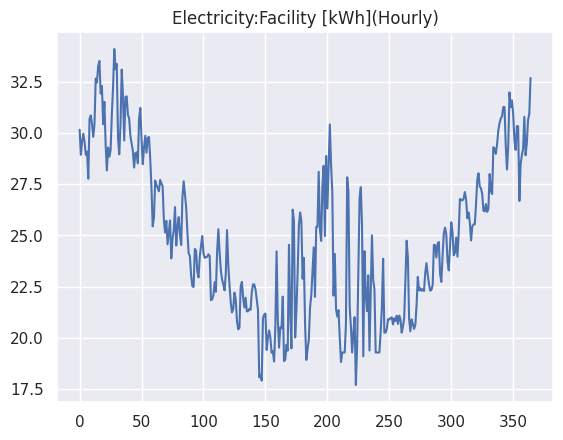

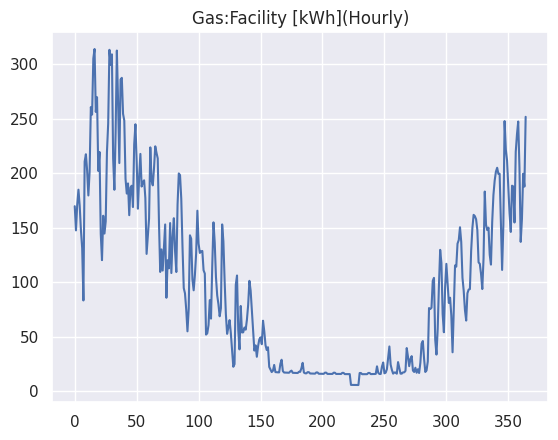

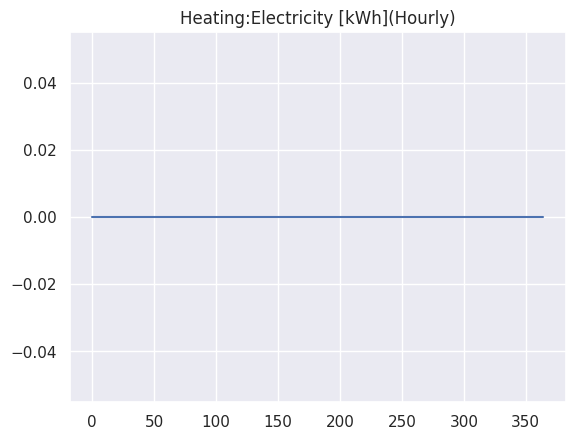

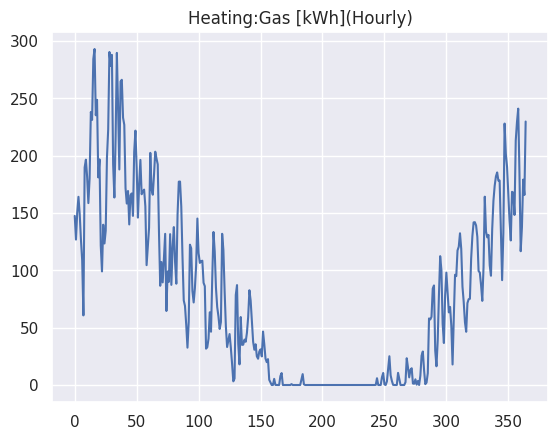

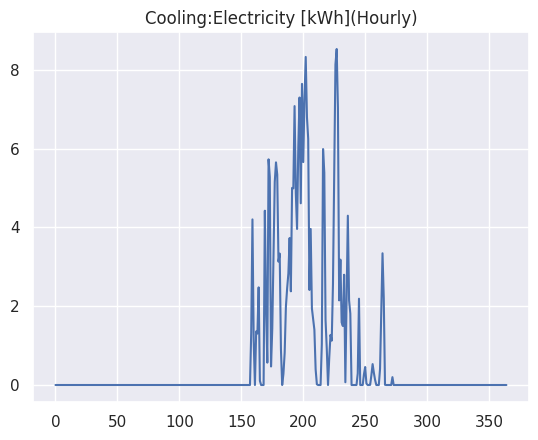

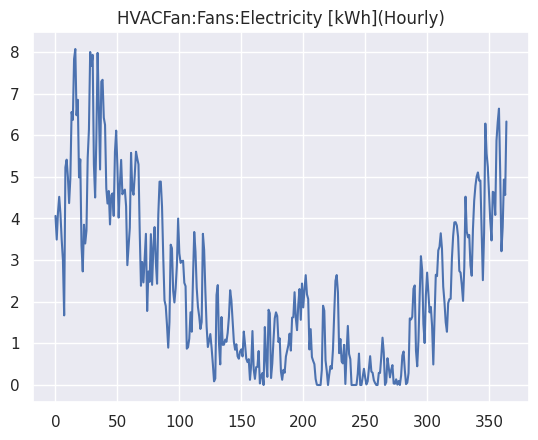

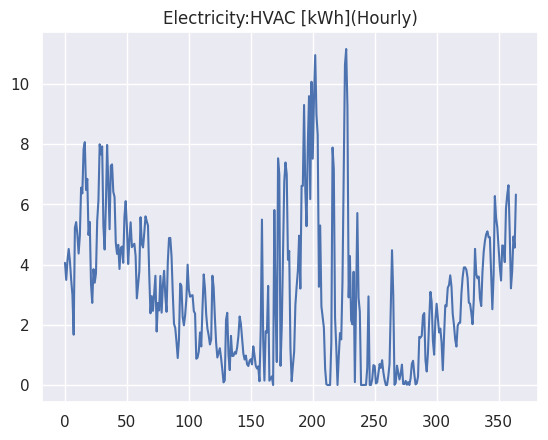

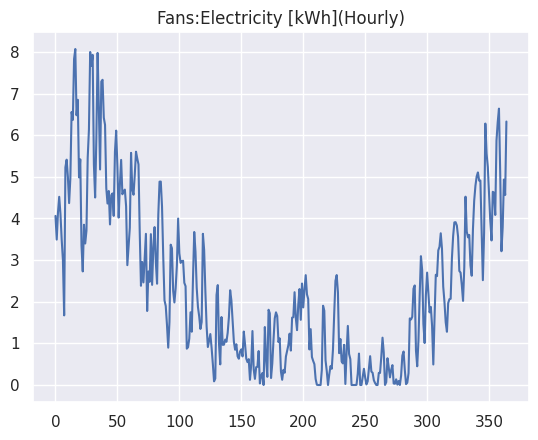

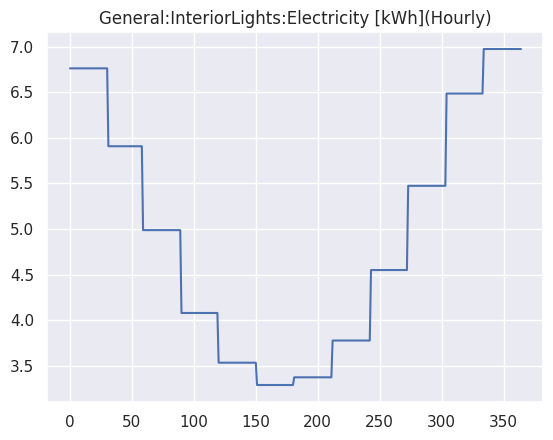

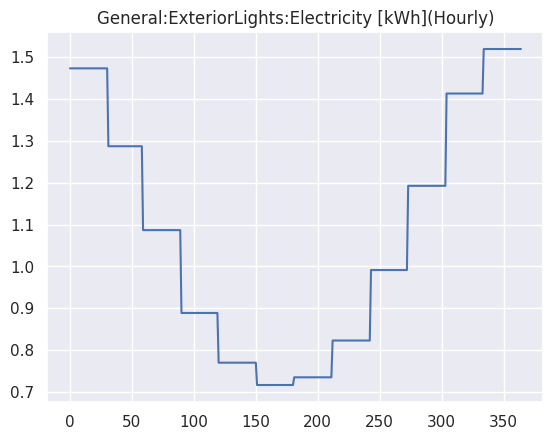

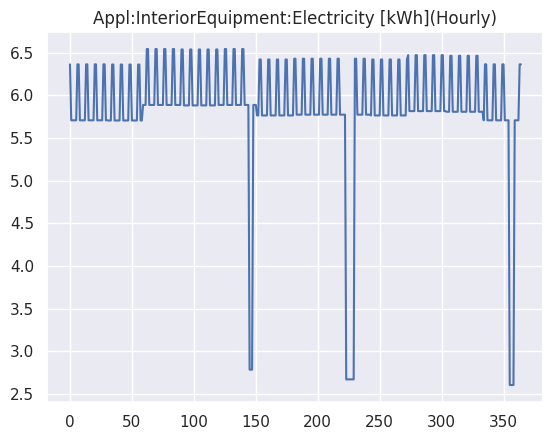

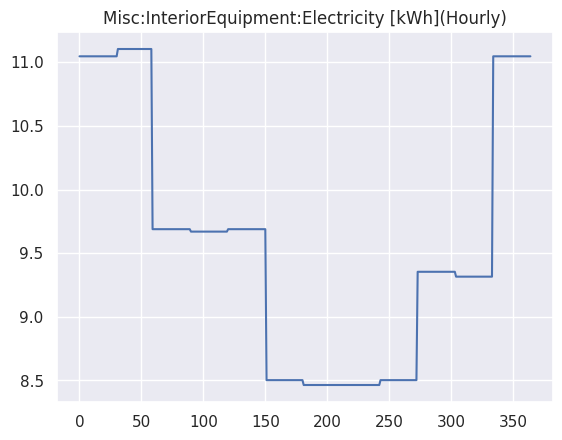

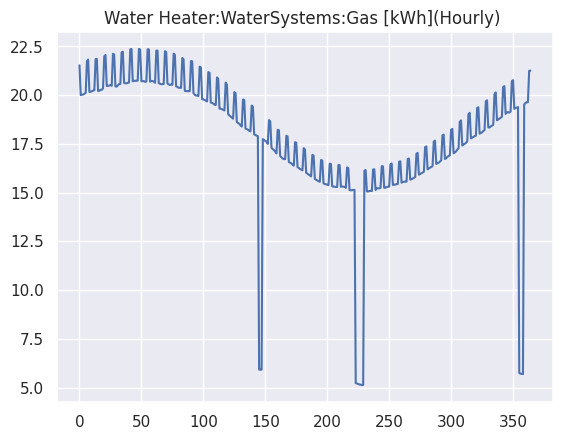

In [8]:
%matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

for col in df_new.columns:
  
  plt.figure()
  plt.title(col)
  df_new[col].plot(kind='line')
  plt.show()



## Pre-analysis 



1.   From the plts above, we see that there are a couple of patterns:



*   Cycle behaviour for using the electricity which can help us for forecasting and prediction the usage for next year.

*   the usage is can be explained by the time of the year (which ultimately we can have a differnet variable involve, i.e., temperature to avoid any cor-linearlity or confouding variables.






2.   There's a jump in the end of the cycle in the usage which can be explained by the population growth in Indianapolis over 2022 year. So, in the analysis we are assuming cyclic behaviour and we need to adjust the beggining of the new cycle (need more data to get a better adjsutment).




In [11]:
df_temp = pd.read_csv('/content/IN_Temp.csv')
df_temp

,Day,Max,Avg,Min
0,1,60,48.3,39
1,2,37,29.3,23
2,3,31,24.7,21
3,4,41,30.9,22
4,5,39,28.0,14
...,...,...,...,...
360,361,29,25.1,21
361,362,49,38.1,26
362,363,58,52.9,46
363,364,56,52.9,50


In [28]:
#stats about the temps
df_new['temp'] = df_temp['Avg']
df_new['temp'].describe()



count    365.000000
mean      53.795068
std       19.608408
min       -4.200000
25%       38.200000
50%       56.100000
75%       72.000000
max       87.800000
Name: temp, dtype: float64

[]

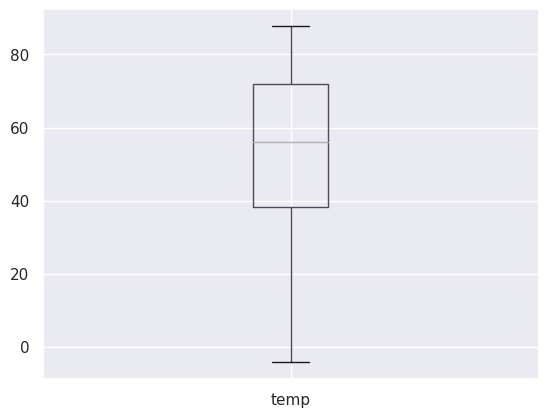

In [27]:
b_plot = df_new.boxplot(column = 'temp')
b_plot.plot()


Text(0.5, 1.0, 'Usage vs Temp')

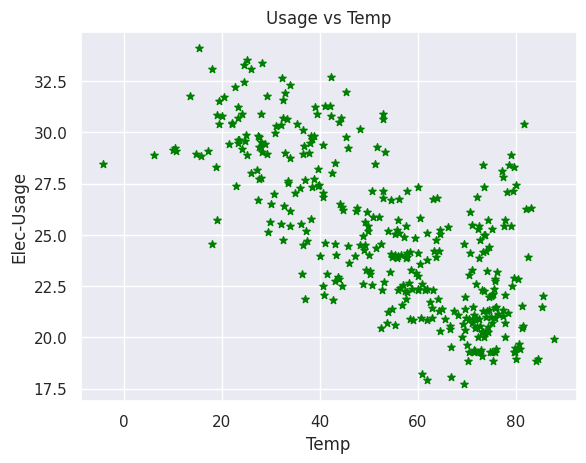

In [23]:
# plotting points as a scatter plot
plt.scatter(df_new['temp'], df_new['Electricity:Facility [kWh](Hourly)'], label= "stars", color= "green", 
            marker= "*", s=30)
  
# x-axis label
plt.xlabel('Temp')
# frequency label
plt.ylabel('Elec-Usage')
# plot title
plt.title('Usage vs Temp')

 **I will run some tests to see if there are relationship between temperature and usage of electiricty.**



In [45]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = np.array(df_new['temp']).reshape(-1, 1)
y = np.array(df_new['Electricity:Facility [kWh](Hourly)']).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10)
 
# Splitting the data into training and testing data
regr = LinearRegression()
 
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.5021857042589324


In [46]:
# Get the coefficients
b = regr.intercept_
m = regr.coef_[0]

# Print the equation
print('y = ' + str(m) + 'x + ' + str(b))

y = [-0.14137577]x + [32.52382922]
